In [1]:
import json
import datetime
import pandas as pd
import matplotlib.pyplot as pl

In [2]:
data=json.load(open('json_plot.json'))

In [3]:
# data=json.loads(data)

In [4]:
data_plot=[]
for i in data:
    temp=[]
    temp.append(i['created_date'])
    data_plot.append(temp)

In [5]:
mapping={1:'Jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}

In [15]:
ls=[1,2,3,4]
lists=map(mapping.get,ls)
list(lists)

['Jan', 'feb', 'mar', 'apr']

In [21]:
def plot_year(year):
    data=json.load(open('json_plot.json'))
    data_plot=[]
    for i in data:
        temp=[]
        temp.append(i['created_date'])
        data_plot.append(temp)
    temp_df=pd.DataFrame(data_plot,columns=['Date'])
    temp_df['Month']=temp_df['Date'].apply(lambda x: pd.to_datetime(x).month)
    temp_df['Year']=temp_df['Date'].apply(lambda x: pd.to_datetime(x).year)
    temp_df=temp_df[temp_df['Year']==year]
    temp_df=temp_df.groupby('Month')['Month'].count()
    json_data={'months':temp_df.keys(),'counts':temp_df.values}
    print(json_data)
    pl.figure(figsize=(10,7))
    pl.title("Scatter plot of Sales per month")
    # pl.grid()
    pl.plot(json_data['months'],json_data['counts'],marker='o')
    pl.grid(alpha=.5)
    pl.xticks(range(1,13),['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
    pl.show()

    pl.figure(figsize=(10,10))
    pl.pie(x=json_data['counts'],
            labels=list(map(mapping.get,json_data['months'])),
            autopct="%0.2f",
           explode=[0,0,0,0,0.1]
          )
    pl.title("Pie plot of Sales per month")
    pl.show()

{'months': Int64Index([1, 2, 3, 4, 5], dtype='int64', name='Month'), 'counts': array([10, 29,  9,  6, 18], dtype=int64)}


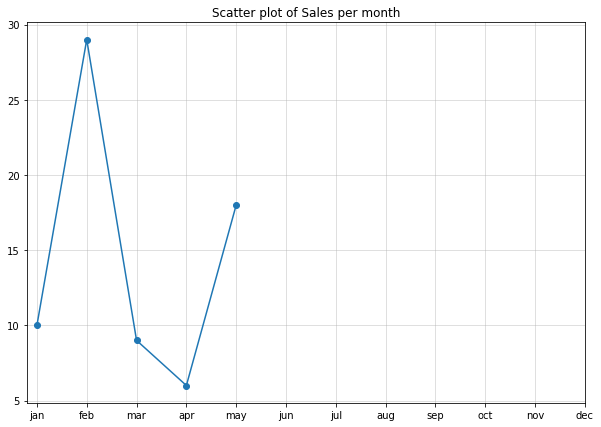

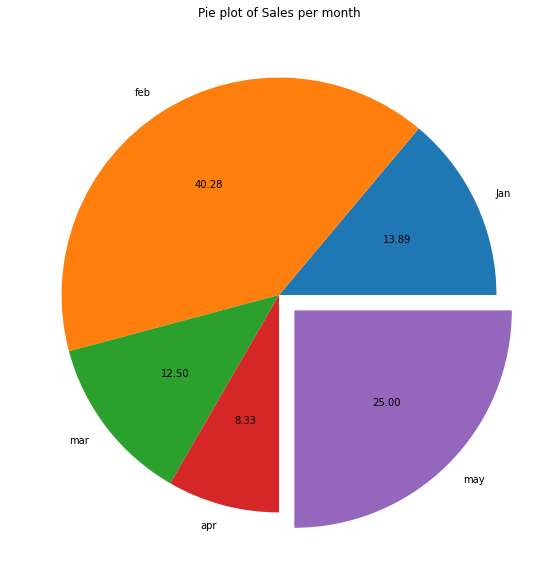

In [22]:
plot_year(2019)

{'months': Int64Index([1, 2, 3, 4, 5], dtype='int64', name='Month'), 'counts': array([ 1, 20,  8,  5, 13], dtype=int64)}


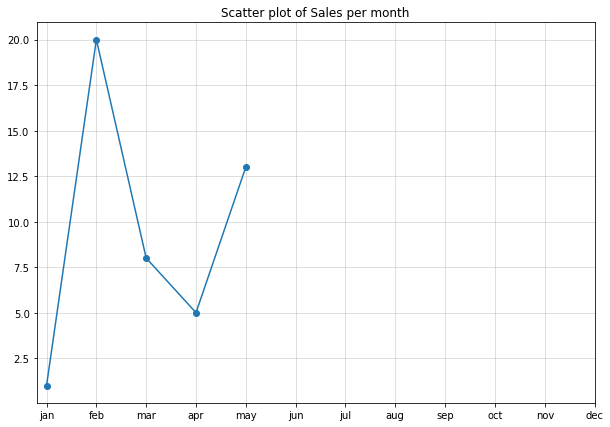

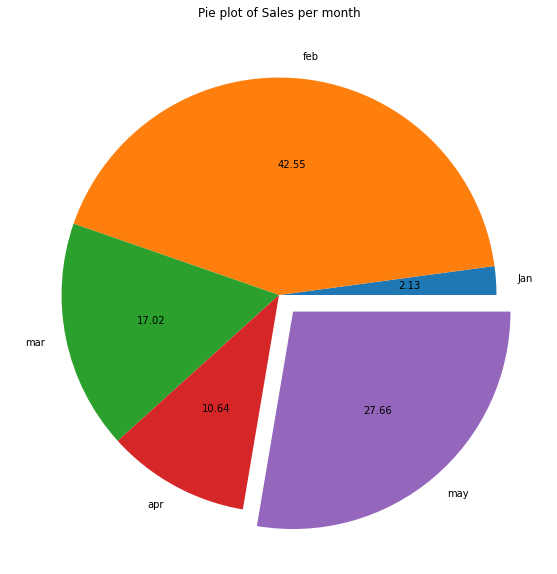

In [23]:
plot_year(2020)

{'months': Int64Index([1, 2, 3, 4, 5], dtype='int64', name='Month'), 'counts': array([ 1, 20,  8,  5, 13], dtype=int64)}


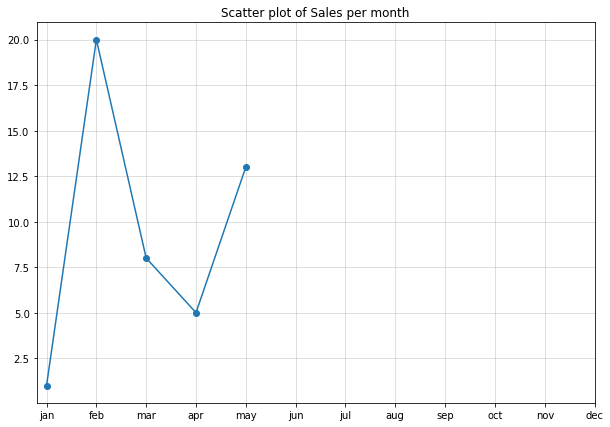

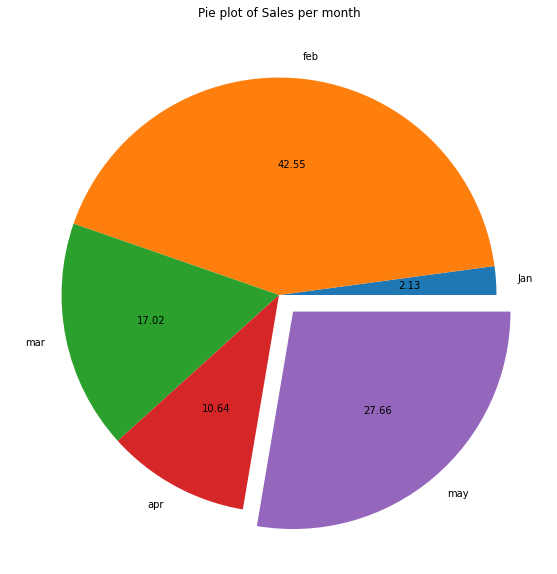

In [24]:
plot_year(2021)

In [25]:
import collections


In [29]:
a=['a','b','a','c','a','b','a']
a.nunique()

AttributeError: 'list' object has no attribute 'nunique'

In [27]:
collections.Counter(a)

Counter({'a': 4, 'b': 2, 'c': 1})